# Problem Statement: Use Regression to find number of possible product will be sold in future



In [ ]:
!pip install --upgrade scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

# Check null

In [4]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

# Check duplication

In [5]:
if df.duplicated().sum() > 0:
    print("There are duplications in data")
else: print("No data duplication")

No data duplication


# Describe quantitative data

In [6]:
display(df.describe()) #Tell which columns are quantitative
(df.describe()).shape[1] #find num columns

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


15

# Describe qualitative data

In [7]:
display(df.describe(include=['O'])) #Tell which columns are qualitative
(df.describe(include=['O'])).shape[1]

,Product type,SKU,Customer demographics,Shipping carriers,Supplier name,Location,Inspection results,Transportation modes,Routes
count,100,100,100,100,100,100,100,100,100
unique,3,100,4,3,5,5,3,4,3
top,skincare,SKU0,Unknown,Carrier B,Supplier 1,Kolkata,Pending,Road,Route A
freq,40,1,31,43,27,25,41,29,43


9

In [8]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [9]:
df = pd.get_dummies(data=df, 
               columns=['Product type', 'Customer demographics','Shipping carriers', 'Supplier name', 'Location', 'Inspection results','Transportation modes','Routes'],
               prefix= None, 
               dtype=int)



In [10]:
df.drop(['SKU','Revenue generated'] , axis=1,inplace=True)

In [11]:
df['inventory'] = df['Availability']+df['Stock levels']
df['total_lead_time'] = df['Lead times'] + df['Shipping times'] + df['Lead time'] + df['Manufacturing lead time']
df['days_of_inventory'] = df['inventory']/(df['Order quantities'] + 1e-6)
df['supplier_lead_time_ratio'] = (df['Lead times'] + df['Shipping times'])/(df['total_lead_time'] + 1e-6)
df['manu_lead_time_ratio'] = (df['Lead time'] + df['Manufacturing lead time'])/(df['total_lead_time'] + 1e-6)



df.drop(['Availability', 'Stock levels'], axis=1,inplace=True)


In [12]:
df

,Price,Number of products sold,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,...,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,inventory,total_lead_time,days_of_inventory,supplier_lead_time_ratio,manu_lead_time_ratio
0,69.808006,802,7,96,4,2.956572,29,215,29,46.279879,...,1,0,0,1,0,113,69,1.177083,0.159420,0.840580
1,14.843523,736,30,37,2,9.716575,23,517,30,33.616769,...,1,0,0,1,0,148,85,4.000000,0.376471,0.623529
2,11.319683,8,10,88,2,8.054479,12,971,27,30.688019,...,0,0,0,0,1,35,51,0.397727,0.235294,0.764706
3,61.163343,83,13,59,6,1.729569,24,937,18,35.624741,...,0,0,1,0,0,91,61,1.542373,0.311475,0.688525
4,4.805496,871,3,56,8,3.890548,5,414,3,92.065161,...,0,0,1,0,0,31,19,0.553571,0.578947,0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,77.903927,672,14,26,9,8.630339,18,450,26,58.890686,...,0,0,1,0,0,80,67,3.076923,0.343284,0.656716
96,24.423131,324,2,32,3,5.352878,28,648,28,17.803756,...,1,0,1,0,0,96,61,3.000000,0.081967,0.918033
97,3.526111,62,19,4,9,7.904846,10,535,13,65.765156,...,1,0,1,0,0,102,51,25.499994,0.549020,0.450980
98,19.754605,913,1,27,7,1.409801,28,581,9,5.604691,...,0,0,1,0,0,96,45,3.555555,0.177778,0.822222


In [13]:
# sns.set_theme(style="ticks")
# sns.pairplot(df)
# plt.show()

In [14]:
corr_matrix = df.corr()
corr_matrix

,Price,Number of products sold,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,...,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,inventory,total_lead_time,days_of_inventory,supplier_lead_time_ratio,manu_lead_time_ratio
Price,1.000000,0.005739,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,...,-0.169689,0.151715,-0.185509,0.145439,5.405627e-02,0.070165,-0.048099,-0.162194,0.116244,-0.116244
Number of products sold,0.005739,1.000000,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,...,-0.018134,0.067570,-0.002978,0.089999,-1.049437e-01,0.078108,-0.015499,0.125966,-0.017118,0.017118
Lead times,0.044855,-0.046419,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,...,0.086117,-0.195877,-0.125421,0.110128,2.230672e-02,0.173387,0.556556,-0.014810,0.666683,-0.666683
Order quantities,0.095819,0.015992,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,...,-0.034219,0.016243,-0.206505,0.190303,2.589102e-02,0.021307,0.074380,-0.452090,0.070958,-0.070958
Shipping times,0.071942,0.087315,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,...,-0.241874,0.228344,0.087558,-0.013372,-9.222958e-02,-0.105096,0.127131,0.009334,0.167962,-0.167962
Shipping costs,0.058543,0.044285,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,...,-0.001462,-0.099132,-0.055460,0.001115,6.729679e-02,0.021427,-0.046603,-0.009408,-0.120592,0.120592
Lead time,0.152185,0.041230,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,...,0.069304,-0.034359,-0.067560,0.094221,-3.010711e-02,-0.061987,0.577847,-0.150350,-0.499544,0.499544
Production volumes,-0.124575,0.187945,-0.145324,-0.086567,-0.060470,-0.097979,0.212676,1.000000,0.184457,0.051504,...,-0.056530,0.019399,-0.012898,-0.076848,1.087196e-01,0.067222,0.133800,0.153025,-0.316824,0.316824
Manufacturing lead time,-0.301313,-0.048939,0.003364,0.112347,-0.016953,-0.005653,0.026756,0.184457,1.000000,-0.158098,...,-0.020702,-0.150374,0.058972,-0.108586,5.807557e-02,0.009723,0.586391,-0.102379,-0.468754,0.468754
Manufacturing costs,-0.184123,0.034284,-0.024441,-0.026784,0.029132,0.005984,-0.121999,0.051504,-0.158098,1.000000,...,0.141496,-0.111943,0.104679,-0.023079,-1.017042e-01,0.119549,-0.168462,0.160195,0.143295,-0.143295


# Find highly correlated feature to clean

In [15]:
high_corr_indices = np.where((corr_matrix > 0.5)&(corr_matrix < 1))

# Create a DataFrame showing only elements > 0.8
high_corr_values = corr_matrix.values[high_corr_indices]
high_corr_df = pd.DataFrame({
    'Feature1': corr_matrix.columns[high_corr_indices[1]],
    'Feature2': corr_matrix.index[high_corr_indices[0]],
    'Correlation': high_corr_values
})

In [16]:
high_corr_df

,Feature1,Feature2,Correlation
0,total_lead_time,Lead times,0.556556
1,supplier_lead_time_ratio,Lead times,0.666683
2,total_lead_time,Lead time,0.577847
3,total_lead_time,Manufacturing lead time,0.586391
4,Lead times,total_lead_time,0.556556
5,Lead time,total_lead_time,0.577847
6,Manufacturing lead time,total_lead_time,0.586391
7,Lead times,supplier_lead_time_ratio,0.666683


# Linear Regression

In [64]:
y = df['Number of products sold']
X = df.drop('Number of products sold', axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=2)

In [66]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train)
results = lm.fit()

In [67]:
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     Number of products sold   R-squared:                       0.496
Model:                                 OLS   Adj. R-squared:                 -0.086
Method:                      Least Squares   F-statistic:                    0.8528
Date:                     Wed, 26 Jun 2024   Prob (F-statistic):              0.681
Time:                             14:24:54   Log-Likelihood:                -478.04
No. Observations:                       70   AIC:                             1032.
Df Residuals:                           32   BIC:                             1118.
Df Model:                               37                                         
Covariance Type:                 nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [68]:
# find  y_hat using test data 
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test.values)

In [69]:
print("Mean Squared Error:", np.mean((y_test.values - y_pred) ** 2))

Mean Squared Error: 105761.11000357746


# Assumption Check for linear regression

<IPython.core.display.Javascript object>


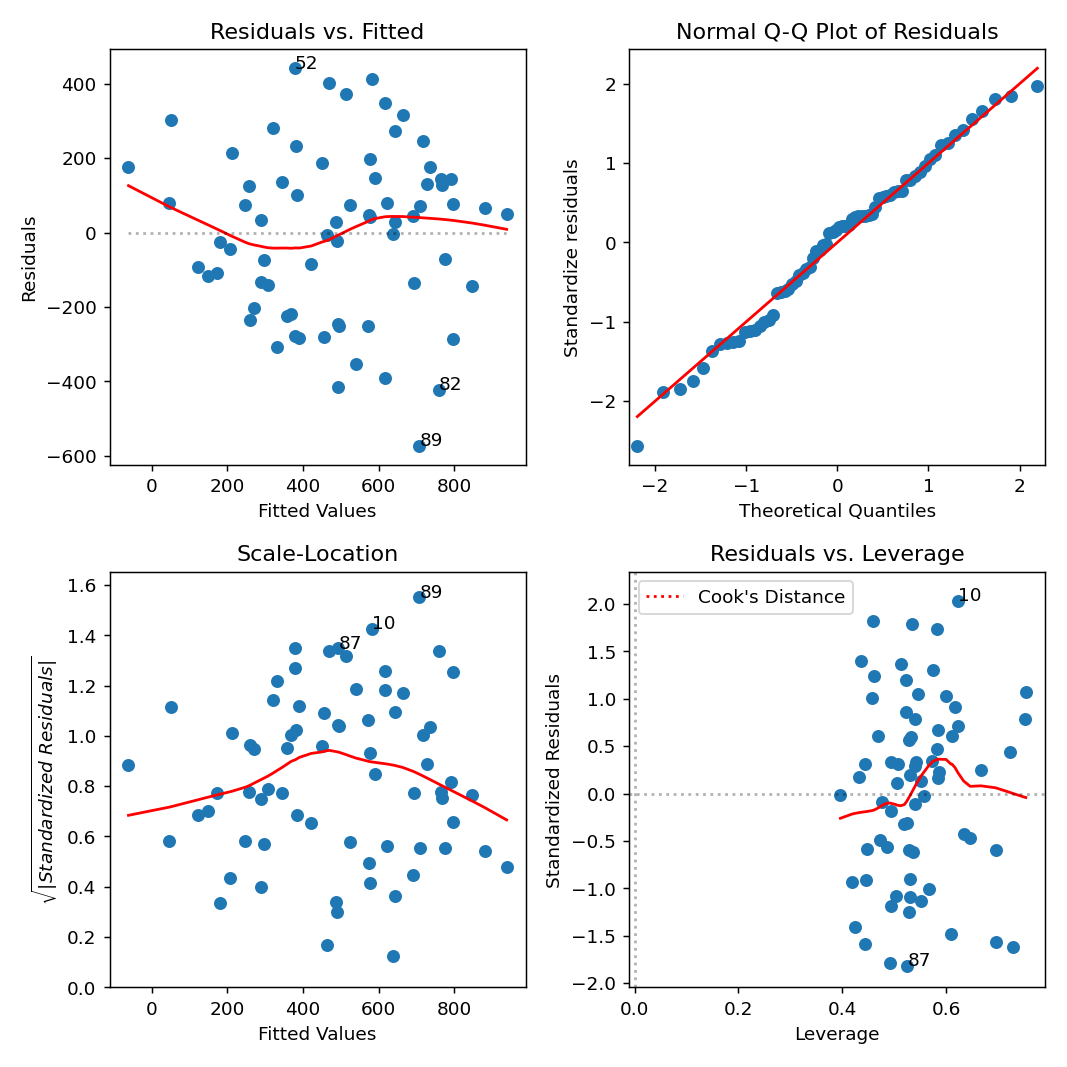

In [81]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.rcParams["figure.figsize"] = (8,8)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
#plt.style.use('seaborn')

#residuals vs fitted
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

ax[0, 0].scatter(fitted, residuals)
ax[0, 0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_title('Residuals vs. Fitted')
ax[0, 0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax[0, 0].annotate(i,xy=(fitted[i],residuals[i]))

#QQ plots
sm.qqplot(residuals, line='s',ax=ax[0, 1], fit=True)
ax[0, 1].set_ylabel('Standardize residuals')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_title('Normal Q-Q Plot of Residuals')

#Scale Location
standardize_residuals = results.get_influence().resid_studentized_internal
sqrt_standardize_residuals = pd.Series(np.sqrt(np.abs(standardize_residuals)))
sqrt_standardize_residuals.index = results.resid.index
smoothed = lowess(sqrt_standardize_residuals,fitted)
top3 = abs(sqrt_standardize_residuals).sort_values(ascending = False)[:3]
ax[1, 0].scatter(fitted, sqrt_standardize_residuals)
ax[1, 0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax[1, 0].set_ylabel('$\sqrt{|Standardized \ Residuals|}$')
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_ylim(0,max(sqrt_standardize_residuals)+0.1)
for i in top3.index:
    ax[1, 0].annotate(i,xy=(fitted[i],sqrt_standardize_residuals[i]))
    
#Residuals vs Leverage    
standardize_residuals_series = pd.Series(results.get_influence().resid_studentized_internal)
standardize_residuals_series.index = results.resid.index
df = pd.DataFrame(standardize_residuals_series)
df.columns = ['standardize_residuals_series']
df['leverage'] = results.get_influence().hat_matrix_diag
smoothed = lowess(df['standardize_residuals_series'],df['leverage'])
sorted_standardize_residuals = abs(df['standardize_residuals_series']).sort_values(ascending = False)
top3 = sorted_standardize_residuals[:3]

x = df['leverage']
y = df['standardize_residuals_series']
xpos = max(x)+max(x)*0.01  
ax[1,1].scatter(x, y)
ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax[1,1].set_ylabel('Standardized Residuals')
ax[1,1].set_xlabel('Leverage')
ax[1,1].set_title('Residuals vs. Leverage')
ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(results.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax[1,1].legend()


# Result

- Assumption holds (Residual show normality, independent, and homoscedasticity) but not a good performance because of small number of data set. R-squared is low, no factor is significant, bad performance overall. As a result, it is not a good model to used yet. Anyway, proposed method such as ridge regression could improve the result



# Ridge Regression

In [108]:
param_grid = {'alpha': np.logspace(-2, 10, 100)}

reg = Ridge()

# Do the cross validation within training data set to get the best alpha (lambda)

reg_cv = GridSearchCV(estimator=reg, 
                      scoring = ['neg_mean_squared_error', 'r2', 'explained_variance'], 
                      param_grid=param_grid, 
                      refit=False,#comment this if you have finished tuning
                      return_train_score=True, #comment this if you have finished tuning
                      cv=5)
#reg_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=LeaveOneOut())
# reg_cv = GridSearchCV(estimator=reg, param_grid=param_grid, cv= KFold(n_splits=3, shuffle=True))
reg_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,
       3.05385551e-02, 4.03701726e-02, 5.33669923e-02, 7.05480231e-02,
       9.32603347e-02, 1.23284674e-01, 1.62975083e-01, 2.15443469e-01,
       2.84803587e-01, 3.76493581e-01, 4.97702356e-01, 6.57933225e-01,
       8.69749003e-01, 1.14975700e+00, 1.51991108e+00, 2....
       4.97702356e+07, 6.57933225e+07, 8.69749003e+07, 1.14975700e+08,
       1.51991108e+08, 2.00923300e+08, 2.65608778e+08, 3.51119173e+08,
       4.64158883e+08, 6.13590727e+08, 8.11130831e+08, 1.07226722e+09,
       1.41747416e+09, 1.87381742e+09, 2.47707636e+09, 3.27454916e+09,
       4.32876128e+09, 5.72236766e+09, 7.56463328e+09, 1.00000000e+10])},
             refit=False, return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2', 'explained_variance'])

In [111]:
result_df = pd.DataFrame(reg_cv.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_train_explained_variance,split1_train_explained_variance,split2_train_explained_variance,split3_train_explained_variance,split4_train_explained_variance,mean_train_explained_variance,std_train_explained_variance
0,0.007295,0.010116,0.002563,0.000413,1.000000e-02,{'alpha': 0.01},-360823.876374,-199828.200859,-283038.005348,-251323.630059,...,-1.815204,0.168703,100,0.694289,0.597519,0.600126,0.536741,0.650860,0.615907,0.053329
1,0.001985,0.000049,0.002235,0.000116,1.321941e-02,{'alpha': 0.013219411484660288},-359355.982936,-198165.782354,-283001.889848,-250949.813199,...,-1.806553,0.171710,99,0.694220,0.597452,0.600108,0.536731,0.650739,0.615850,0.053301
2,0.002157,0.000064,0.002284,0.000100,1.747528e-02,{'alpha': 0.01747528400007684},-357612.837162,-196186.437505,-282947.867452,-250474.629755,...,-1.796139,0.175696,98,0.694119,0.597352,0.600081,0.536717,0.650562,0.615766,0.053261
3,0.002072,0.000096,0.002218,0.000041,2.310130e-02,{'alpha': 0.023101297000831605},-355581.784161,-193878.893497,-282866.027980,-249874.005447,...,-1.783794,0.180804,97,0.693976,0.597208,0.600040,0.536695,0.650314,0.615647,0.053206
4,0.002054,0.000090,0.002245,0.000099,3.053856e-02,{'alpha': 0.030538555088334154},-353257.318473,-191246.350906,-282741.181985,-249118.538756,...,-1.769353,0.187078,96,0.693783,0.597010,0.599982,0.536664,0.649983,0.615484,0.053132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001927,0.000030,0.002132,0.000030,3.274549e+09,{'alpha': 3274549162.877732},-124493.763255,-81028.856881,-116112.159225,-88686.997530,...,0.000111,0.000088,32,0.000128,0.000176,0.000246,0.000188,0.000159,0.000179,0.000039
96,0.001909,0.000008,0.002122,0.000006,4.328761e+09,{'alpha': 4328761281.083061},-124498.782299,-81031.335600,-116112.615092,-88688.825290,...,0.000084,0.000067,33,0.000097,0.000133,0.000186,0.000142,0.000120,0.000136,0.000030
97,0.001918,0.000018,0.002122,0.000005,5.722368e+09,{'alpha': 5722367659.35022},-124502.581467,-81033.212372,-116112.961250,-88690.209810,...,0.000064,0.000050,34,0.000073,0.000101,0.000141,0.000107,0.000091,0.000103,0.000022
98,0.001911,0.000010,0.002159,0.000079,7.564633e+09,{'alpha': 7564633275.54629},-124505.456797,-81034.633061,-116113.223856,-88691.258229,...,0.000048,0.000038,35,0.000055,0.000076,0.000107,0.000081,0.000069,0.000078,0.000017


<IPython.core.display.Javascript object>


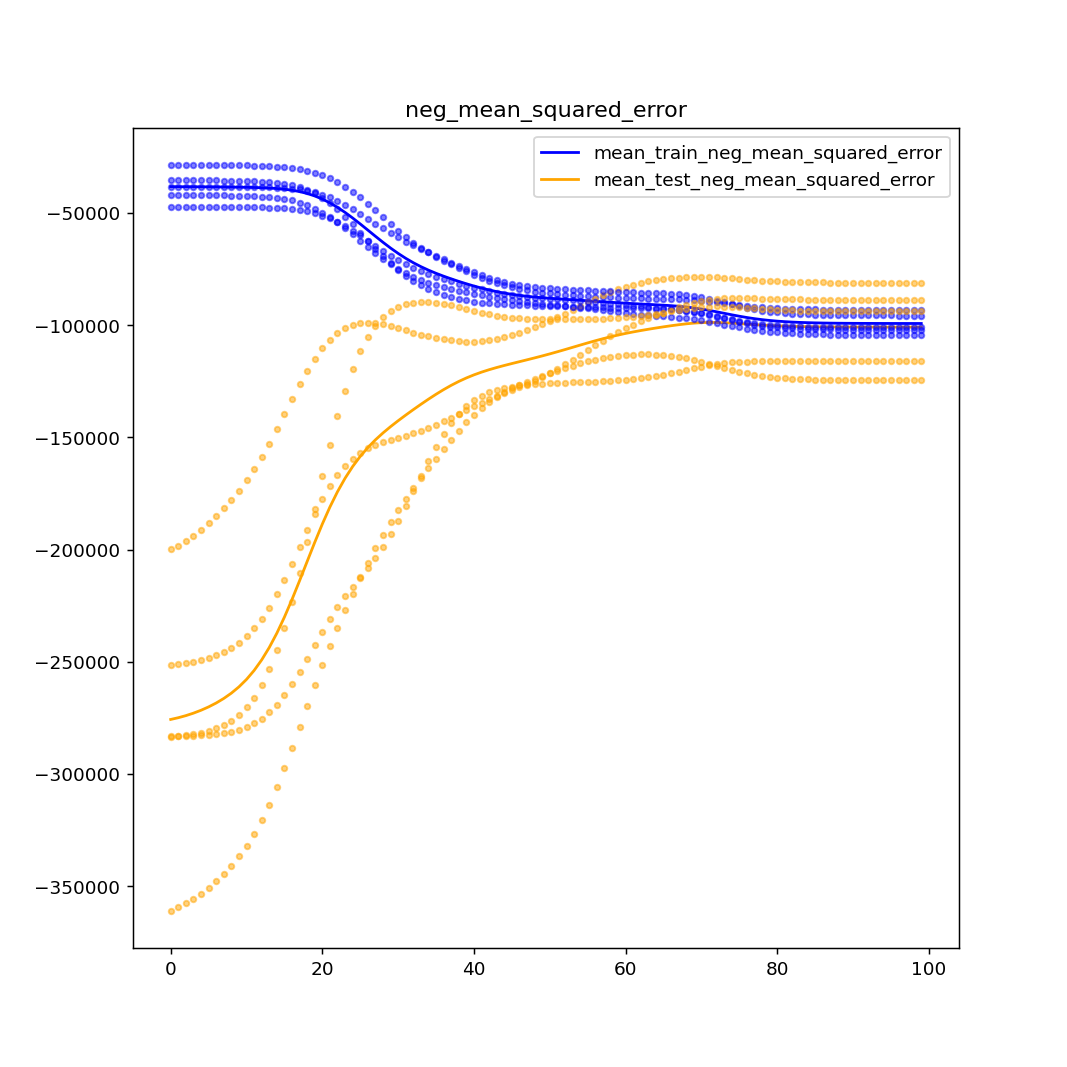

<IPython.core.display.Javascript object>


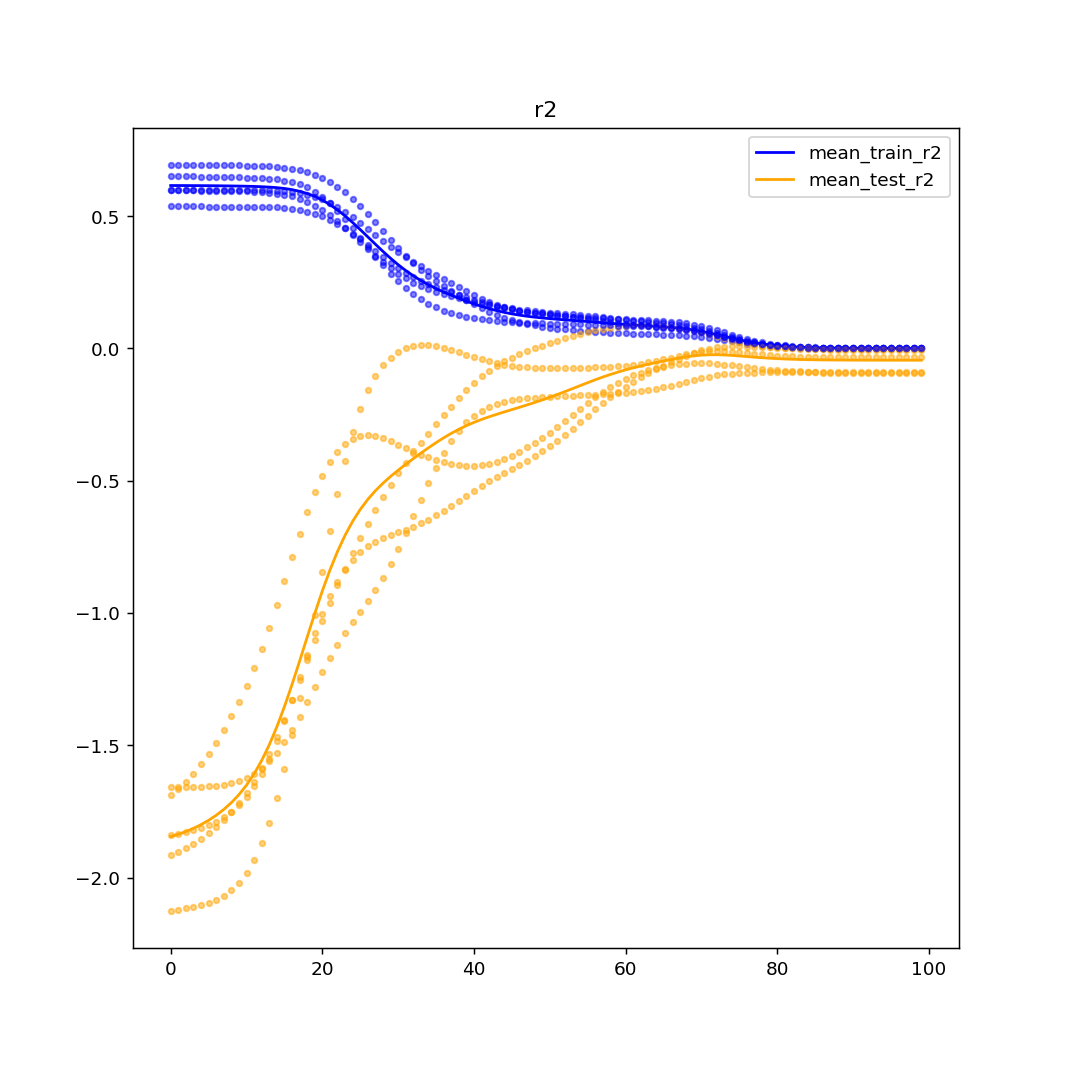

<IPython.core.display.Javascript object>


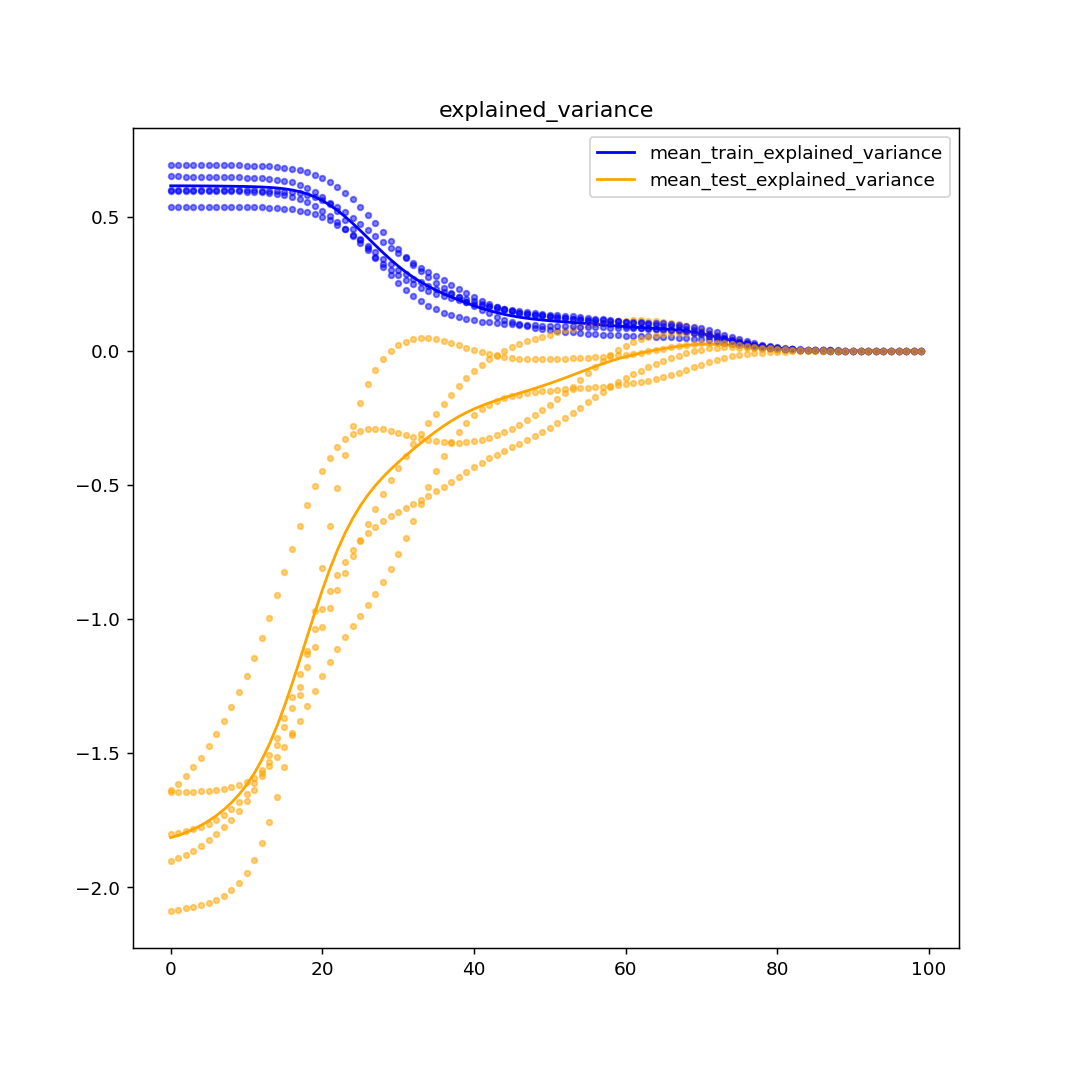

In [130]:
def plot_cv_stats(df,stat, cv):    

    ax = df[['mean_train_%s' % stat,'mean_test_%s' % stat]].plot(color=['b','orange'])
  
    for i in range(0,5):

        df[['split%d_train_%s' % (i, stat),'split%d_test_%s' % (i, stat)]].plot(style='.', ax=ax, legend=False, color=['b','orange'], alpha=0.5)
  
    plt.title(stat)

    plt.show()
plot_cv_stats(result_df,'neg_mean_squared_error', 5)

plot_cv_stats(result_df,'r2', 5)

plot_cv_stats(result_df,'explained_variance', 5)

# It turns out that best alpha is around row 70-80

In [120]:
result_df.iloc[75].param_alpha

12328467.394420683

In [125]:
best_alpha = result_df.iloc[75].param_alpha

# fit model and find y_hat using x_test
reg = Ridge(alpha=best_alpha)
reg.fit(X_train.values, y_train.values)
y_pred = reg.predict(X_test.values)

print("Mean Squared Error:", np.mean((y_test.values - y_pred) ** 2))

Mean Squared Error: 76056.5609928503


In [126]:
reg.coef_

array([ 0.00000000e+00, -5.89807450e-03, -9.87987594e-04,  1.60864391e-03,
        6.29934030e-04,  5.35016109e-04,  2.65269113e-04,  8.95378908e-02,
        4.58551057e-05,  3.73675268e-03,  9.86212971e-05, -5.36059415e-03,
       -1.45985657e-05, -1.25418287e-04,  1.40016853e-04, -1.65971607e-05,
       -9.54809537e-05,  3.52714468e-05,  7.68066676e-05,  6.97635706e-05,
        1.00801468e-04, -1.70565039e-04, -5.51618978e-05,  1.45657358e-05,
        5.76731841e-05, -6.36831932e-05,  4.66061712e-05, -1.48959323e-04,
       -1.03532485e-04,  1.32192653e-04,  1.34334588e-04, -1.40354319e-05,
       -1.25575707e-04, -7.03209314e-05,  1.95896638e-04, -3.85408353e-05,
       -1.03594493e-05, -2.80637504e-06,  5.17066596e-05, -4.76134154e-05,
        1.12645281e-04, -6.50318656e-05,  3.52620617e-03, -4.69293448e-05,
       -4.57772207e-04, -1.44637257e-05,  1.44637245e-05])

In [127]:
y_test

83    663
30    327
56     93
24    209
16    280
23    391
2       8
27    352
28    394
13    249
99    627
92    276
76    241
14    562
0     802
21    601
3      83
29    253
61    117
79    198
35    449
11    960
84    618
44    919
73    375
5     147
25    142
77    359
74    904
62    270
Name: Number of products sold, dtype: int64

# Lasso selection

In [128]:
param_grid = {'alpha': np.logspace(-2, 10, 100)}

lass = Lasso()

# Do the cross validation within training data set to get the best alpha (lambda)

lass_cv = GridSearchCV(estimator=reg, 
                      scoring = ['neg_mean_squared_error', 'r2', 'explained_variance'], 
                      param_grid=param_grid, 
                      refit=False,#comment this if you have finished tuning
                      return_train_score=True, #comment this if you have finished tuning
                      cv=5)
#reg_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=LeaveOneOut())
#reg_cv = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alphas), cv= KFold(n_splits=5, shuffle=True))
lass_cv.fit(X_train.values, y_train.values)


GridSearchCV(cv=5, estimator=Ridge(alpha=12328467.394420683),
             param_grid={'alpha': array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,
       3.05385551e-02, 4.03701726e-02, 5.33669923e-02, 7.05480231e-02,
       9.32603347e-02, 1.23284674e-01, 1.62975083e-01, 2.15443469e-01,
       2.84803587e-01, 3.76493581e-01, 4.97702356e-01, 6.57933225e-01,
       8.69749003e-01, 1.149757...
       4.97702356e+07, 6.57933225e+07, 8.69749003e+07, 1.14975700e+08,
       1.51991108e+08, 2.00923300e+08, 2.65608778e+08, 3.51119173e+08,
       4.64158883e+08, 6.13590727e+08, 8.11130831e+08, 1.07226722e+09,
       1.41747416e+09, 1.87381742e+09, 2.47707636e+09, 3.27454916e+09,
       4.32876128e+09, 5.72236766e+09, 7.56463328e+09, 1.00000000e+10])},
             refit=False, return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2', 'explained_variance'])

In [129]:
result_lasso = pd.DataFrame(lass_cv.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_train_explained_variance,split1_train_explained_variance,split2_train_explained_variance,split3_train_explained_variance,split4_train_explained_variance,mean_train_explained_variance,std_train_explained_variance
0,0.001670,0.001311,0.001697,0.000285,1.000000e-02,{'alpha': 0.01},-360823.876374,-199828.200859,-283038.005348,-251323.630059,...,-1.815204,0.168703,100,0.694289,0.597519,0.600126,0.536741,0.650860,0.615907,0.053329
1,0.000807,0.000097,0.001270,0.000129,1.321941e-02,{'alpha': 0.013219411484660288},-359355.982936,-198165.782354,-283001.889848,-250949.813199,...,-1.806553,0.171710,99,0.694220,0.597452,0.600108,0.536731,0.650739,0.615850,0.053301
2,0.000789,0.000060,0.001240,0.000095,1.747528e-02,{'alpha': 0.01747528400007684},-357612.837162,-196186.437505,-282947.867452,-250474.629755,...,-1.796139,0.175696,98,0.694119,0.597352,0.600081,0.536717,0.650562,0.615766,0.053261
3,0.000719,0.000009,0.001146,0.000010,2.310130e-02,{'alpha': 0.023101297000831605},-355581.784161,-193878.893497,-282866.027980,-249874.005447,...,-1.783794,0.180804,97,0.693976,0.597208,0.600040,0.536695,0.650314,0.615647,0.053206
4,0.000708,0.000004,0.001130,0.000006,3.053856e-02,{'alpha': 0.030538555088334154},-353257.318473,-191246.350906,-282741.181985,-249118.538756,...,-1.769353,0.187078,96,0.693783,0.597010,0.599982,0.536664,0.649983,0.615484,0.053132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000719,0.000007,0.001152,0.000021,3.274549e+09,{'alpha': 3274549162.877732},-124493.763255,-81028.856881,-116112.159225,-88686.997530,...,0.000111,0.000088,32,0.000128,0.000176,0.000246,0.000188,0.000159,0.000179,0.000039
96,0.000723,0.000026,0.001190,0.000053,4.328761e+09,{'alpha': 4328761281.083061},-124498.782299,-81031.335600,-116112.615092,-88688.825290,...,0.000084,0.000067,33,0.000097,0.000133,0.000186,0.000142,0.000120,0.000136,0.000030
97,0.000732,0.000025,0.001134,0.000013,5.722368e+09,{'alpha': 5722367659.35022},-124502.581467,-81033.212372,-116112.961250,-88690.209810,...,0.000064,0.000050,34,0.000073,0.000101,0.000141,0.000107,0.000091,0.000103,0.000022
98,0.000719,0.000020,0.001133,0.000013,7.564633e+09,{'alpha': 7564633275.54629},-124505.456797,-81034.633061,-116113.223856,-88691.258229,...,0.000048,0.000038,35,0.000055,0.000076,0.000107,0.000081,0.000069,0.000078,0.000017


<IPython.core.display.Javascript object>


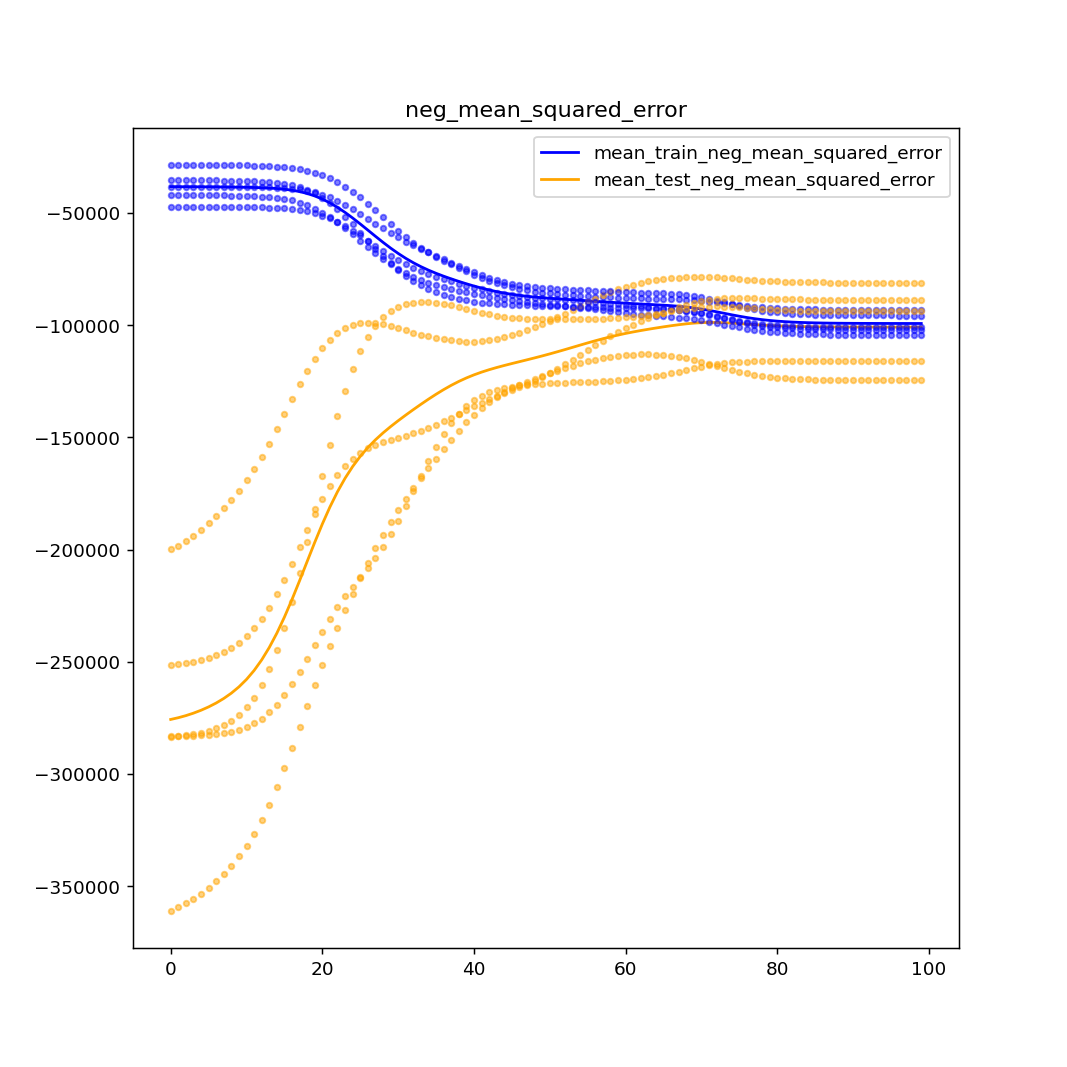

<IPython.core.display.Javascript object>


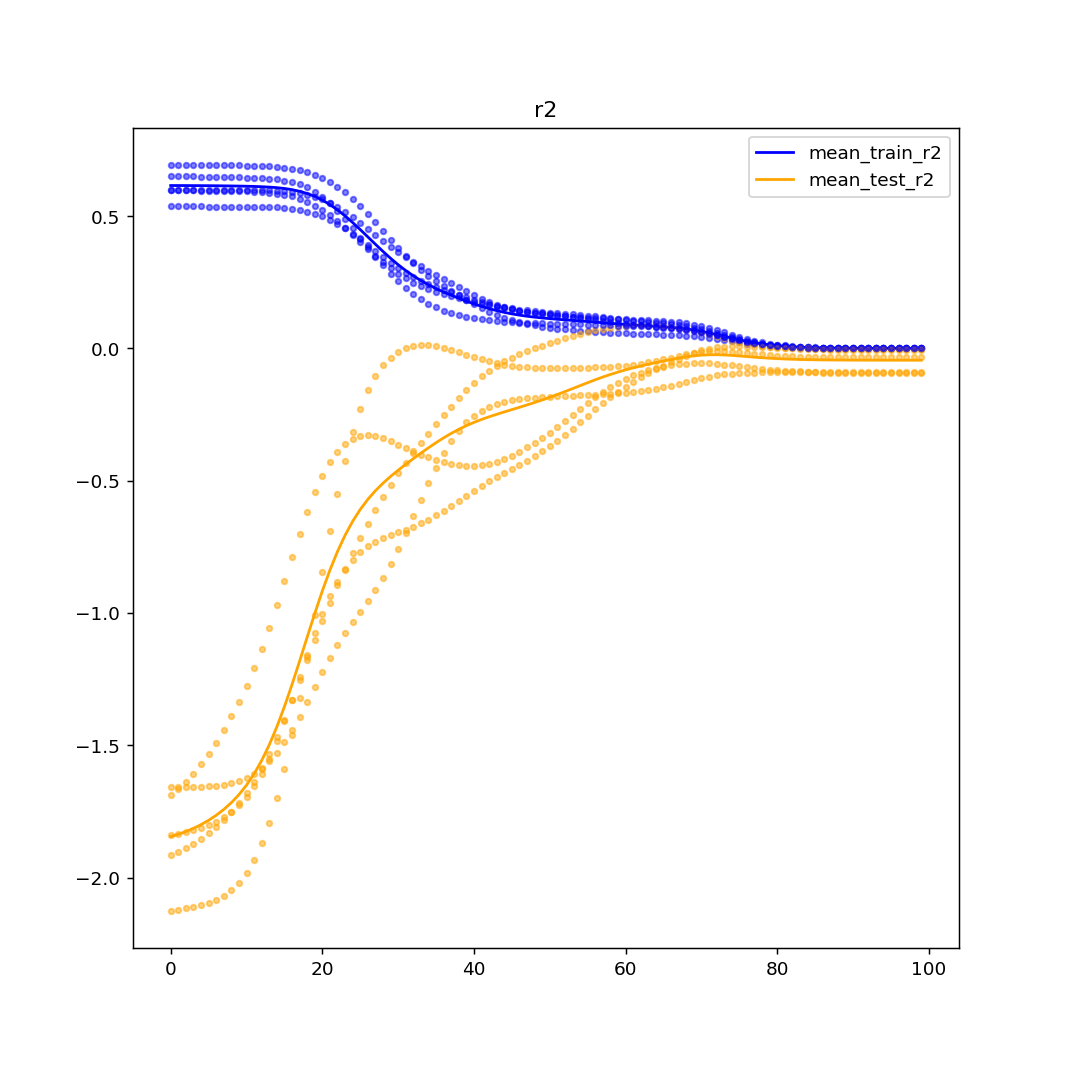

<IPython.core.display.Javascript object>


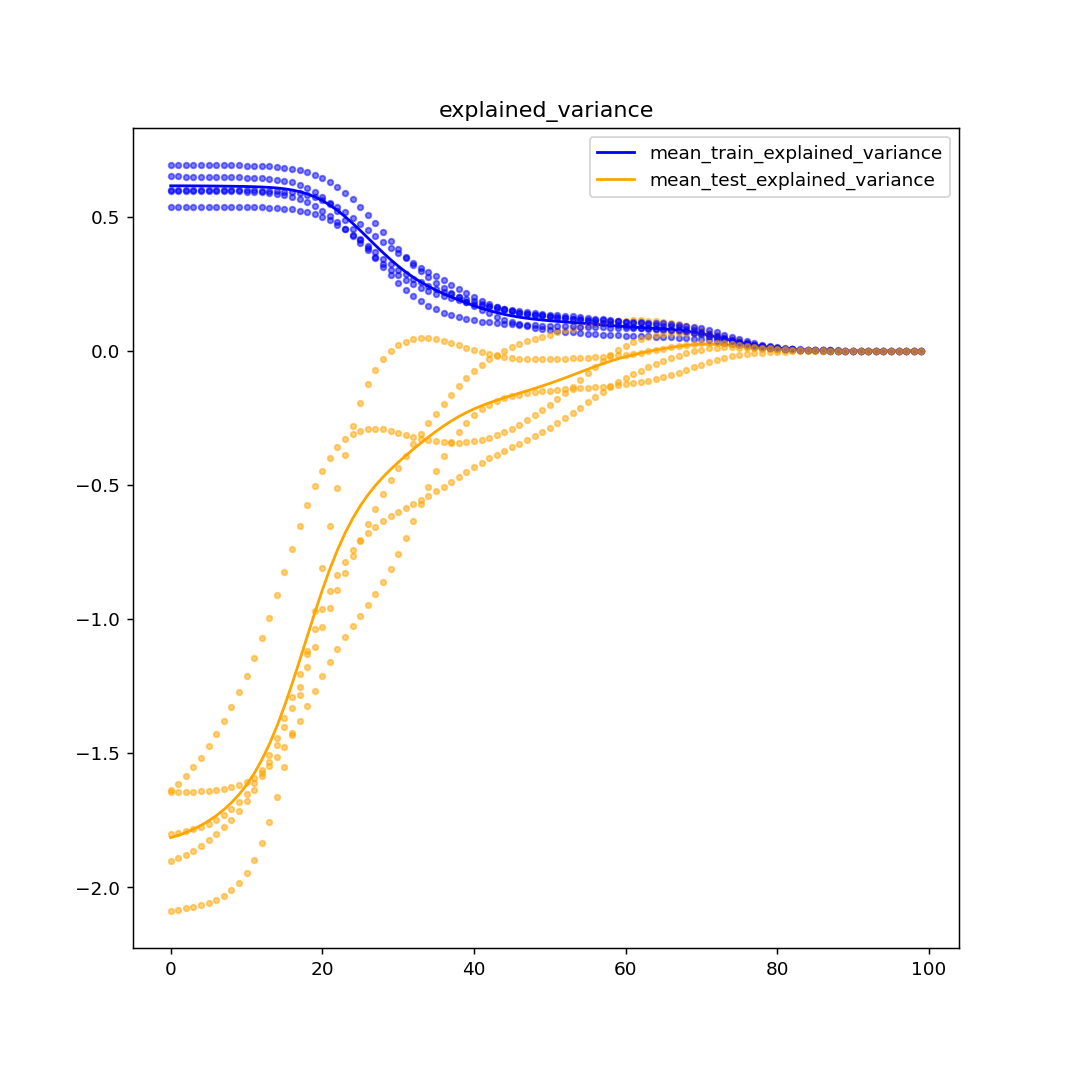

In [131]:
plot_cv_stats(result_lasso,'neg_mean_squared_error', 5)

plot_cv_stats(result_lasso,'r2', 5)

plot_cv_stats(result_lasso,'explained_variance', 5)

# It turns out that best alpha is around row 70-80 for Lasso selection too

In [135]:
result_lasso.iloc[75].param_alpha

12328467.394420683

In [136]:
best_alpha = result_lasso.iloc[75].param_alpha


# fit model and find y_hat using x_test

best_lass = Lasso(alpha=best_alpha)
best_lass.fit(X_train.values, y_train.values)
y_pred = best_lass.predict(X_test.values)

print("Mean Squared Error:", np.mean((y_test.values - y_pred) ** 2))

Mean Squared Error: 75318.96666666666


In [137]:
best_lass.coef_

array([ 0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.,  0.])

In [138]:
y_pred

array([489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489.,
       489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489.,
       489., 489., 489., 489., 489., 489., 489., 489.])

# Result
- Lasso push every coefficient to zero. It looks like that Ridged regression provide the best model here